## Database Engineer Capstone Week 3

***

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy as sp


import datetime
from datetime import datetime, timedelta
from scipy import stats

import mysql.connector as connector

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.option_context('float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Load Data from SQL database

Your first step is to import the connector module, enter your user details and connect with the database (Hint: you can use an alias when importing the module).

### MySQL

In [3]:
#Create a connection

mydb = connector.connect(
  user="sqluser",
  passwd="password",
  database="littlelemondb",
  auth_plugin='mysql_native_password'  
)

In [4]:
print(mydb)

In [5]:
mycursor = mydb.cursor()

In [6]:
mycursor

In [7]:
mydb.reconnect() #Reconnect cursor

In this second task, you now need to query the database to show all tables within the database. 

In [8]:
pd.read_sql_query('SHOW tables', mydb)

,Tables_in_littlelemondb
0,bookings
1,customers
2,employees
3,menuitems
4,menus
5,orders
6,ordersview
7,ordersview2


In [9]:
pd.read_sql_query("SHOW columns FROM bookings", mydb)

,Field,Type,Null,Key,Default,Extra
0,BookingID,int,NO,PRI,None,auto_increment
1,BookingDate,datetime,NO,,None,
2,TableNumber,int,NO,,None,
3,CustomerID,int,NO,,None,
4,EmployeeID,int,NO,,None,


An alternate way to learn the same information would be to use the DESCRIBE function. The syntax is:

In [10]:
pd.read_sql_query("DESCRIBE bookings", mydb)

,Field,Type,Null,Key,Default,Extra
0,BookingID,int,NO,PRI,None,auto_increment
1,BookingDate,datetime,NO,,None,
2,TableNumber,int,NO,,None,
3,CustomerID,int,NO,,None,
4,EmployeeID,int,NO,,None,


For the third and final task, Little Lemon need you to return specific details from your database. They require the full name and contact details for every customer that has placed an order greater than $60 for a promotional campaign. 

In [11]:
pd.read_sql_query("SELECT * FROM customers", mydb)

,CustomerID,FullName,ContactNumber,Email
0,1,Vanessa McCarthy,111111,None
1,2,Marcos Romero,222222,None
2,3,Anna Iversen,333333,None
3,4,Joakim Iversen,444444,None
4,5,Diana Pinto,555555,None
5,6,Hiroki Yamane,666666,None


In [12]:
pd.read_sql_query("SELECT * FROM orders", mydb)

,OrderID,MenuID,CustomerID,Quantity,TotalCost
0,1,1,3,5,250
1,2,2,4,5,200
2,3,2,1,3,100
3,4,3,2,4,150
4,5,1,6,2,90
5,6,4,5,1,60


In [13]:
pd.read_sql_query("""SELECT customers.FullName, customers.ContactNumber FROM customers
                    INNER JOIN orders
                    ON customers.CustomerID = orders.CustomerID
                    WHERE orders.TotalCost > 60
                    """, mydb)

,FullName,ContactNumber
0,Anna Iversen,333333
1,Joakim Iversen,444444
2,Vanessa McCarthy,111111
3,Marcos Romero,222222
4,Hiroki Yamane,666666


The cloned repository contains a procedure called GetMaxQuantity(). Call this procedure and verify 

In [14]:
mydb.reconnect() #Reconnect cursor
pd.read_sql_query("""CALL GetMaxQuantity();""", mydb)

,Max Quantity in Order
0,5


Call the ManageBooking() procedure by passing the appropriate parameters. First with an available table number, then with one that has already been reserved.

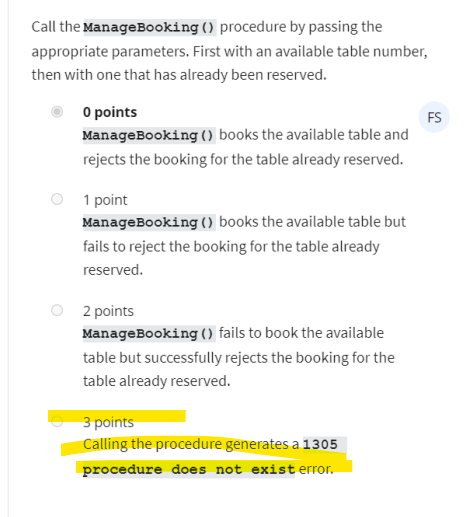

In [15]:
mydb.reconnect() #Reconnect cursor
pd.read_sql_query("""CALL ManageBooking("2022-12-17", 5);""", mydb)

DatabaseError: Execution failed on sql 'CALL ManageBooking("2022-12-17", 5);': 1305 (42000): PROCEDURE littlelemondb.ManageBooking does not exist

Create an SQL statement that calls the AddBooking() procedure

Call the cursor .execute() method using the above parameters. Print out the result using the cursor .fetchall() method.

SINCE THE POINTS SYSTEM ALLOCATES 5 POINTS IF THERE IS NO MESSAGE, THE CONFIRMATION MESSAGE WAS REMOVED (COMMENTED OUT)


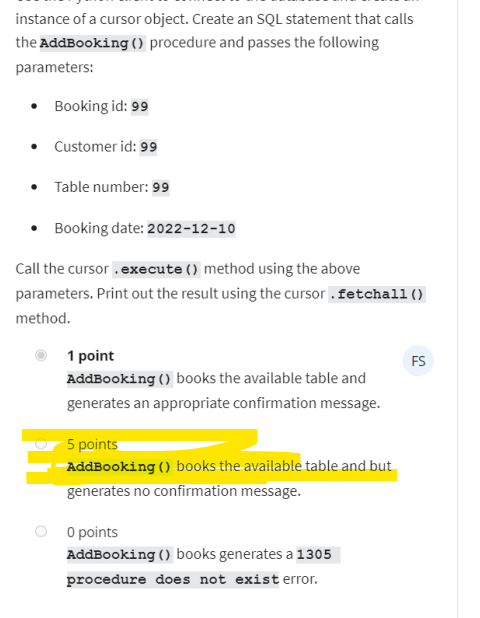

In [17]:
mydb.reconnect() #Reconnect cursor
pd.read_sql_query("""CALL AddBooking(99,"2022-12-10",99,15,26);""", mydb)


,Confirmation
0,NO Confirmation Message99


Create a SQL statement that calls the UpdateBooking() procedure

SINCE THE POINTS SYSTEM ALLOCATES 5 POINTS IF THERE IS NO MESSAGE, THE CONFIRMATION MESSAGE WAS REMOVED (COMMENTED OUT)

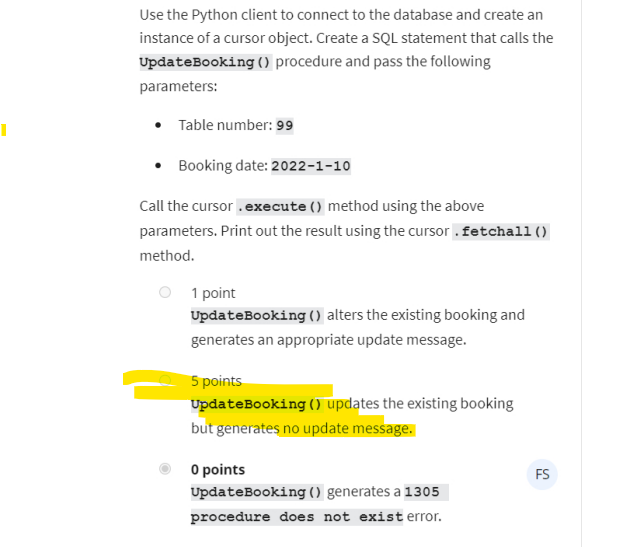

In [ ]:
mydb.reconnect() #Reconnect cursor
pd.read_sql_query("""CALL UpdateBooking(99, "2022-01-10");""", mydb)

TypeError: 'NoneType' object is not iterable

In [16]:
mydb.reconnect() #Reconnect cursor
pd.read_sql_query("""SELECT * FROM Bookings;""", mydb)

,BookingID,BookingDate,TableNumber,CustomerID,EmployeeID
0,1,2022-01-10,3,3,1
1,2,2022-01-10,1,4,2
2,3,2022-01-10,1,1,3
3,4,2022-01-10,4,2,4
4,5,2022-01-10,6,6,6
5,6,2022-01-10,5,5,5


Create a SQL statement that calls the CancelBooking() procedure:

SINCE THE POINTS SYSTEM ALLOCATES 5 POINTS IF THERE IS NO MESSAGE, THE CONFIRMATION MESSAGE WAS REMOVED (COMMENTED OUT)

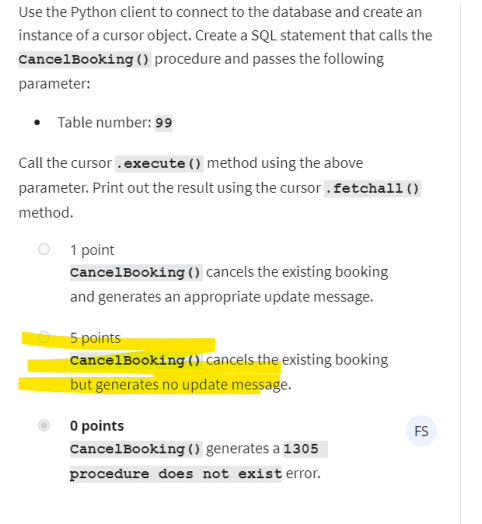

In [ ]:
mydb.reconnect() #Reconnect cursor
pd.read_sql_query("""CALL CancelBooking(99);""", mydb)

TypeError: 'NoneType' object is not iterable

In [ ]:
mydb.reconnect() #Reconnect cursor
pd.read_sql_query("""SELECT * FROM Bookings;""", mydb)

,BookingID,BookingDate,TableNumber,CustomerID,EmployeeID
0,1,2022-01-10,3,3,1
1,2,2022-01-10,1,4,2
2,3,2022-01-10,1,1,3
3,4,2022-01-10,4,2,4
4,5,2022-01-10,6,6,6
5,6,2022-01-10,5,5,5


In [ ]:
mydb.close()